## Домашнее задание 3 (10 баллов) // ДЕДЛАЙН ПРОДЛЁН НА НЕДЕЛЮ

### О задании

В этом домашнем задании вы получите опыт подготовки данных и EDA (Exploratory Data Analysis), приблизившись к реальной работе с данными с помощью уже знакомых вам инструментов: numpy, pandas, matplotlib и seaborn.

Вы будет работать с задачей кредитного скоринга (оценка надёжности клиента). Предоставляются данные о 1000 клиентов, про которых известно около 20 признаков и положительная или отрицательная оценка в качестве кредитуемого. Эти данные нужно будет подготовить, исследовать (в том числе с помощью средств визуализации) и даже попробовать предложить какую-нибудь формулу для условной оценки надёжности клиентов исходя из предоставленных данных. Описание данных:
https://www.rdocumentation.org/packages/evtree/versions/1.0-8/topics/GermanCredit

Каждый построенный график необходимо красиво оформить - для этого требуется как минимум указать его название, а также отметить, что изображено по каждой из осей.
Также по каждому графику ожидается небольшой комментарий с выводами.

*Функции, которые могут пригодиться при оформлении графиков: `.show()`, `.title()`, `.xlabel()`, `.ylabel()`*

In [475]:
import pandas as pd
import sklearn

### Задание 1 (0.0 балла)

Прочитайте средствами pandas файл с данными по ссылке https://raw.githubusercontent.com/hse-ds/iad-intro-ds/master/2022/homeworks/hw03-EDA/german_credit.csv. Выведите базовое представление таблицы (первые 5 и последние 5 строк, размер).

In [476]:
df = pd.read_csv('https://raw.githubusercontent.com/hse-ds/iad-intro-ds/master/2022/homeworks/hw03-EDA/german_credit.csv')
df

,status,duration,credit_history,purpose,amount,savings,employment_duration,installment_rate,personal_status_sex,other_debtors,...,property,age,other_installment_plans,housing,number_credits,job,people_liable,telephone,foreign_worker,credit_risk
0,no checking account,18,all credits at this bank paid back duly,car (used),1049,unknown/no savings account,< 1 yr,< 20,female : non-single or male : single,none,...,car or other,21,none,for free,1,skilled employee/official,0 to 2,no,no,good
1,no checking account,9,all credits at this bank paid back duly,others,2799,unknown/no savings account,1 <= ... < 4 yrs,25 <= ... < 35,male : married/widowed,none,...,unknown / no property,36,none,for free,2-3,skilled employee/official,3 or more,no,no,good
2,... < 0 DM,12,no credits taken/all credits paid back duly,retraining,841,... < 100 DM,4 <= ... < 7 yrs,25 <= ... < 35,female : non-single or male : single,none,...,unknown / no property,23,none,for free,1,unskilled - resident,0 to 2,no,no,good
3,no checking account,12,all credits at this bank paid back duly,others,2122,unknown/no savings account,1 <= ... < 4 yrs,20 <= ... < 25,male : married/widowed,none,...,unknown / no property,39,none,for free,2-3,unskilled - resident,3 or more,no,yes,good
4,no checking account,12,all credits at this bank paid back duly,others,2171,unknown/no savings account,1 <= ... < 4 yrs,< 20,male : married/widowed,none,...,car or other,38,bank,rent,2-3,unskilled - resident,0 to 2,no,yes,good
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,no checking account,24,no credits taken/all credits paid back duly,furniture/equipment,1987,unknown/no savings account,1 <= ... < 4 yrs,25 <= ... < 35,male : married/widowed,none,...,unknown / no property,21,none,for free,1,unskilled - resident,3 or more,no,no,bad
996,no checking account,24,no credits taken/all credits paid back duly,others,2303,unknown/no savings account,>= 7 yrs,< 20,male : married/widowed,co-applicant,...,unknown / no property,45,none,rent,1,skilled employee/official,0 to 2,no,no,bad
997,... >= 200 DM / salary for at least 1 year,21,all credits at this bank paid back duly,others,12680,... >= 1000 DM,>= 7 yrs,< 20,male : married/widowed,none,...,real estate,30,none,own,1,manager/self-empl./highly qualif. employee,0 to 2,yes (under customer name),no,bad
998,... < 0 DM,12,no credits taken/all credits paid back duly,furniture/equipment,6468,... >= 1000 DM,unemployed,25 <= ... < 35,male : married/widowed,none,...,real estate,52,none,rent,1,manager/self-empl./highly qualif. employee,0 to 2,yes (under customer name),no,bad


### Задание 2 (0.5 балла)

Определите, есть ли пропуски в данных. Разделите признаки на количественные, бинарные, порядковые и категориальные.

In [477]:
df.info() # пропусков нет

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   status                   1000 non-null   object
 1   duration                 1000 non-null   int64 
 2   credit_history           1000 non-null   object
 3   purpose                  1000 non-null   object
 4   amount                   1000 non-null   int64 
 5   savings                  1000 non-null   object
 6   employment_duration      1000 non-null   object
 7   installment_rate         1000 non-null   object
 8   personal_status_sex      1000 non-null   object
 9   other_debtors            1000 non-null   object
 10  present_residence        1000 non-null   object
 11  property                 1000 non-null   object
 12  age                      1000 non-null   int64 
 13  other_installment_plans  1000 non-null   object
 14  housing                  1000 non-null   

In [478]:
df.nunique() # уникальные значения

status                       4
duration                    33
credit_history               5
purpose                     10
amount                     923
savings                      5
employment_duration          5
installment_rate             4
personal_status_sex          4
other_debtors                3
present_residence            4
property                     4
age                         53
other_installment_plans      3
housing                      3
number_credits               4
job                          4
people_liable                2
telephone                    2
foreign_worker               2
credit_risk                  2
dtype: int64

Потом попробуй astype['category'] для 'object' хз, чтоб как на семинаре

Следовательно, мы можем разделить признаки так: 

количественные: amount, age 

бинарные (Так как всего по 2 уникальных значения на столбец. Насколько я знаю, необязательно, чтобы данны были противоположными): people_liable (см. предпосылку по бинарным признакам ниже), telephone, foreign_worker, credit_risk (последние 3 признака - см. описание датасета) 

порядковые: status, duration, credit_history (можно ранжировать, относительно интересов банка), savings (тоже), employment_duration (тоже), number_credits (тоже, но не в однозначном ключе), property (можно ранжировать, относительно интересов банка), (тоже), purpose (потенциально можно ранжировать относительно интересов банка, но переменная выглядит очень нестабильной, так как за представленными уровнями может скрываться множество различных дополнительных переменных, сильно влияющих на конкретный случай (так, образование можно получать в разных вузах и разное, поддержанный автомобиль может стоить дороже нового, но другой модели и т.д.)), housing (cм. описание датасета, статус  места жительства клиента, также можно ранжировать), present_residence (сколько человек живет в данном месте), other_installment_plans (переменная, указывающая другие планы рассрочки и т.д.)

категориальные: installment_rate (в целом, тоже, но также можно было записать и в порядковые, имею ввиду, здесь нет однозначности), personal_status_sex (пол + статус отношений), other_debtors (см. описание датасета), job (работа клиента)

Исходил из определений:

Количественным называется признак, отдельные варианты которого имеют числовое выражение и отражают размеры, масштабы изучаемого объекта или явления. Например, доход домохозяйства, площадь жилого помещения, цена товара, стаж работы. Представимы в качестве конечного множества, объекты которого лежат в множестве действительных чисел.

Качественные признаки выражаются нечисловыми значениями и подразделяются на альтернативные, атрибутивные и порядковые.

Бинарным называется признак, имеющий только два варианта значений. Например, продукция предприятия соответствует требованиям или является бракованной, население городское или сельское и т. д. Любые признаки, представимые в качестве множества с 2 уникальными значениями, имеет смысл рассматривать в качестве бинарных, как минимум, с позиций экономии ресурсов (можно конвертировать в bool (и наоборот) без потери данных с помощью специально написанной функции, предварительно написав, что она делает). Признаки должны быть противопоставленными (исхожу из предпосылки, что в анализе данных все признаки изначально противопоставлены друг другу в логическом смысле, ибо иначе бы не было смысла вносить их в датасет именно в таком виде). К детализации характера связи между 2 признаками, которая носит уже скорее статистический смысл приходим после проделанного стат. анализа.

Атрибутивный признак имеет более двух вариантов, которые при этом выражаются в виде понятий или наименований, и не выражаются числом. Например, район проживания, вид продукции, специальность работника и т. д.

Порядковые признаки имеют несколько ранжированных, т.е. упорядоченных по возрастанию или убыванию, качественных вариантов. Например, уровень образования (начальное, неполное среднее, среднее, высшее), уровень квалификации, воинское звание, рейтинг и т. д. Отдельные варианты порядкового признака трудно соизмерить количественно. Например, высшее образование лучше, чем среднее, но при этом нельзя сказать, что оно лучше на 20% или на 30%.

Порядковый признак может иметь числовое выражение. Например, разряд рабочего, экзаменационная оценка. Однако, в обозначении вариантов этих признаков цифры можно заменить буквами алфавита без снижения их информативности. Представимы в виде конечного упорядоченного множества

### Задание 3 (0.5 балла)

Выведите среднюю сумму кредита (колонка amount) в каждой категории (колонка purpose), воспользовавшись методом groupby.

In [479]:
df.groupby('purpose')['amount'].mean()

purpose
business               8209.333333
car (new)              5370.223301
car (used)             3066.983425
domestic appliances    2728.090909
furniture/equipment    2487.685714
others                 3062.948718
radio/television       1498.000000
repairs                3180.400000
retraining             4158.041237
vacation               1205.888889
Name: amount, dtype: float64

### Задание 4 (0.5 балла)


Какой процент клиентов моложе 30 лет (колонка age) снимает жилье (колонка housing)? А какой процент клиентов старше 40 лет снимает жилье?

In [480]:
df[df['age'] < 30]['housing'].value_counts(normalize=True).mul(100)['rent'] # находим долю и умножаем на 100 чтобы был процент

66.66666666666666

In [481]:
df[df['age'] > 40]['housing'].value_counts(normalize=True).mul(100)['rent'] # аналогично

68.01470588235294

### Задание 5 (0.5 балла)

 У скольких иностранцев (foreign_worker) число кредитов (number_credits) больше 3?

In [482]:
print(*df['number_credits'].unique(), sep=', ')

1, 2-3, 4-5, >= 6


In [483]:
print(*df['foreign_worker'].unique(), sep=', ')

no, yes


In [484]:
len(df[((df['number_credits'] == '4-5') | (df['number_credits'] == '>= 6')) & (df['foreign_worker'] == 'yes')])

1

### Задание 6 (1 балл)

In [485]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Используя numpy и matplotlib, начнём с тренировки: постройте график функций $sin(x)$ и $cos(x)$ от $-\pi$ до $\pi$ из 100 точек c легендой и сеткой. Используйте для линий разные цвета, одна из них пусть будет пунктирной. Результат в этом и следующих заданиях на построение графиков должен получиться примерно как на картинке. Содержание подписей не должно обязательно совпадать, однако осмысленные подписи должны присутствовать на графиках.

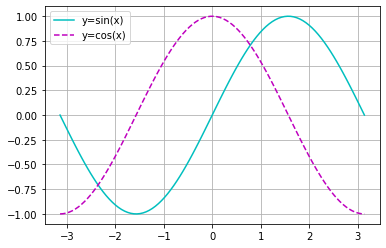

<IPython.core.display.Javascript object>


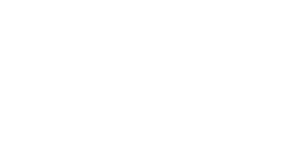

In [486]:
# расстояние по Х, кол-во точек

x = np.linspace(-np.pi, np.pi, 100)
y_sin = np.sin(x)
y_cos = np.cos(x)

# заголовок и подписи по осям соответственно

plt.title('sine & cosine')
plt.xlabel('range between -π and +π')
plt.ylabel('range of Y-values')

# сетка на заднем фоне

plt.grid() 

# параметры графиков
plt.plot(x, y_sin, linestyle = 'solid', color='cyan')
plt.plot(x, y_cos, linestyle = 'dashed', color='cadetblue') # здесь лайнстайл пунктирный
plt.legend(['y = sin(x)', 'y = cos(x)'], loc='upper left') # легенда, лок это угол в котором она появится
plt.show()

### Задание 7 (1 балл)

Рассмотрим сравнительное количество положительных и отрицательных кейсов в зависимости от размера текущего счёта. Постройте зеркальные горизонтальные гистограммы.

In [487]:
# в бинарные и обратно

df['credit_risk'] = df['credit_risk'].map({'bad':0, 'good':1})
good_risk = df.groupby("status")['credit_risk'].sum() # считаем кол-во человек с хорошим риском
df['credit_risk'] = df['credit_risk'].map({0:1, 1:0})
bad_risk = df.groupby("status")['credit_risk'].sum() # с плохим
df['credit_risk'] = df['credit_risk'].map({0:'good', 1:'bad'})

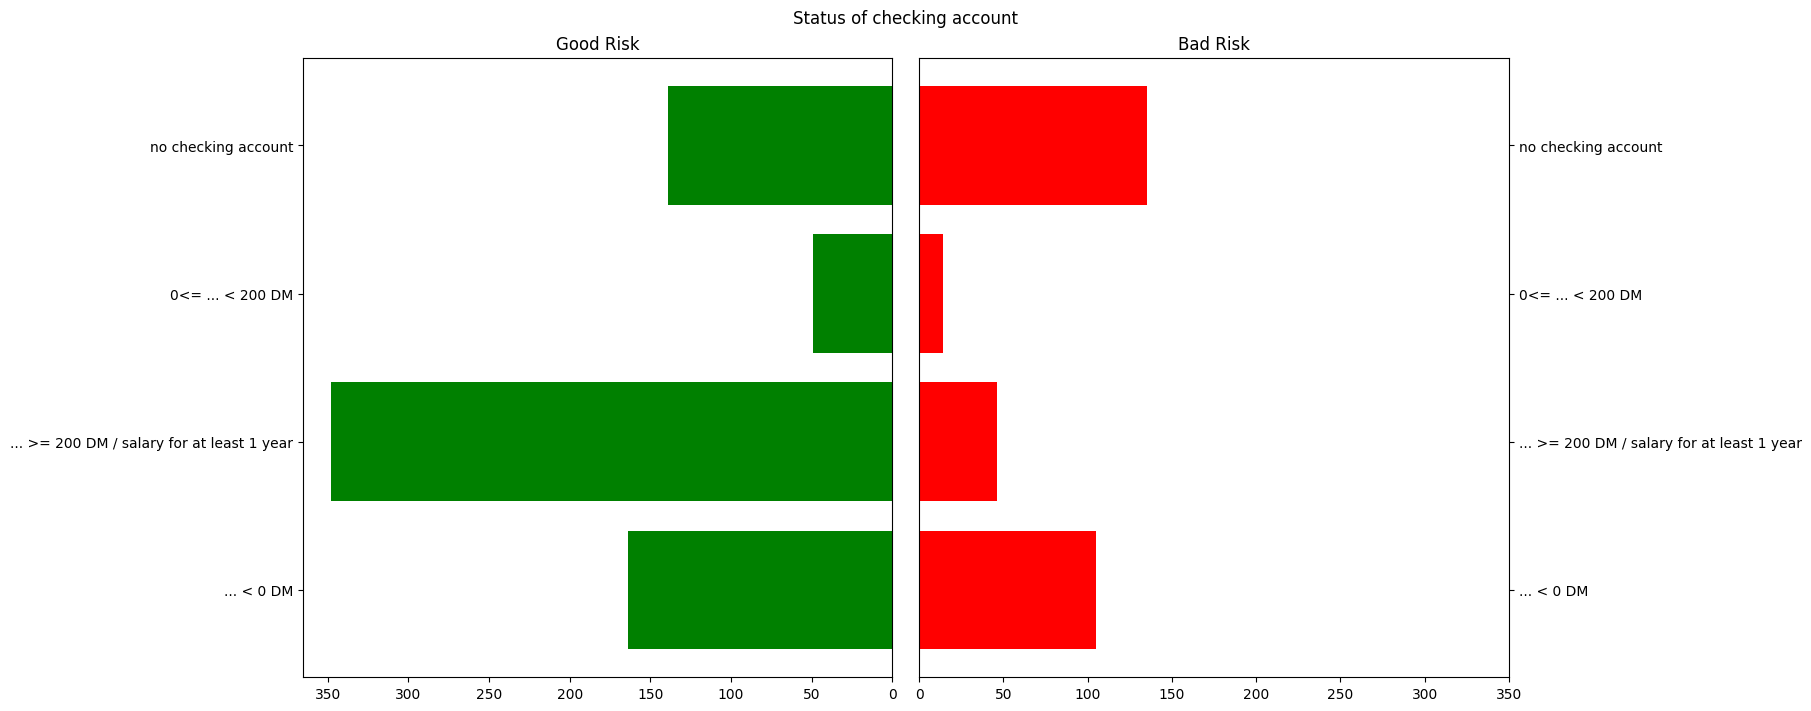

In [488]:
fig, (ax1, ax2) = plt.subplots(1, 2, constrained_layout = True) # сабплоты
fig.suptitle('Status of checking account') 
fig.set_size_inches(18, 7) # размер

ax1.barh(good_risk.index, good_risk.values, color='green')
ax1.set_xticks(np.arange(0, 400, step=50)) # задаём ось Х на графике
ax1.invert_xaxis()
ax1.set_title('Good Risk')

ax2.barh(bad_risk.index, bad_risk.values, color='red') 
ax2.set_xticks(np.arange(0, 400, step=50)) # задаём ось Х на графике
ax2.yaxis.tick_right()
ax2.set_title('Bad Risk')

plt.show()

### Задание 8  (0.5 балла)

In [489]:
import seaborn as sns

Теперь постройте гистограмму для сравнения количества положительных и отрицательных кейсов в зависимости от размера сберегательного счёта с помощью seaborn. Какой способ вам больше нравится с точки зрения трудоёмкости написания кода? А с точки зрения восприятия результата?

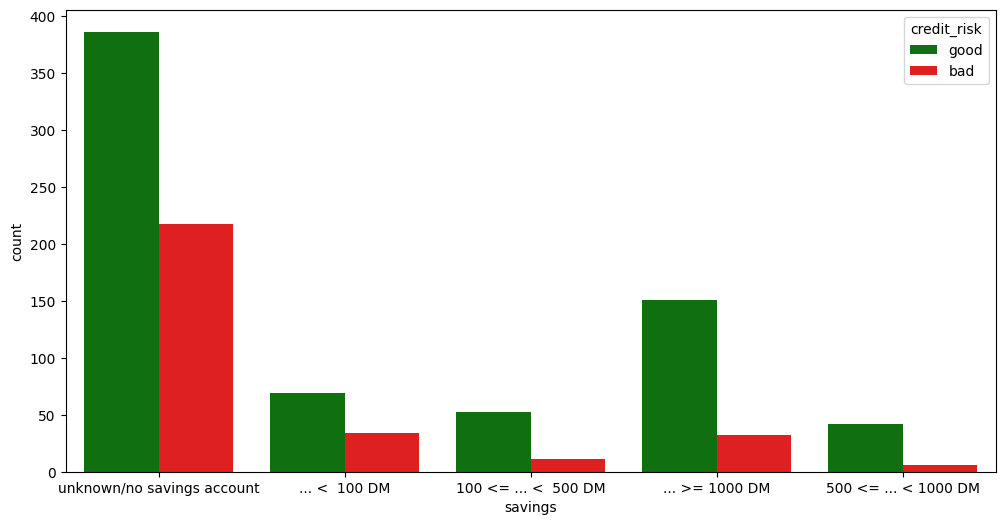

In [490]:
plt.figure(figsize=(12, 6)) # размер
sns.countplot(x='savings', 
              hue='credit_risk',
              data=df, 
              palette=('green', 'red'))
plt.show() 

# Вывод: старараться не пользоваться Матплотом, ибо это время и нервы

### Задание 9  (1 балл)

seaborn легко позволяет добавить ещё больше информации на один график. Для каждого размера сберегательного счёта мы можем оценить не только количество положительных и отрицательных кейсов, но и их распределение по возрасту, например. Постройте подходящую для этого визуализацию.

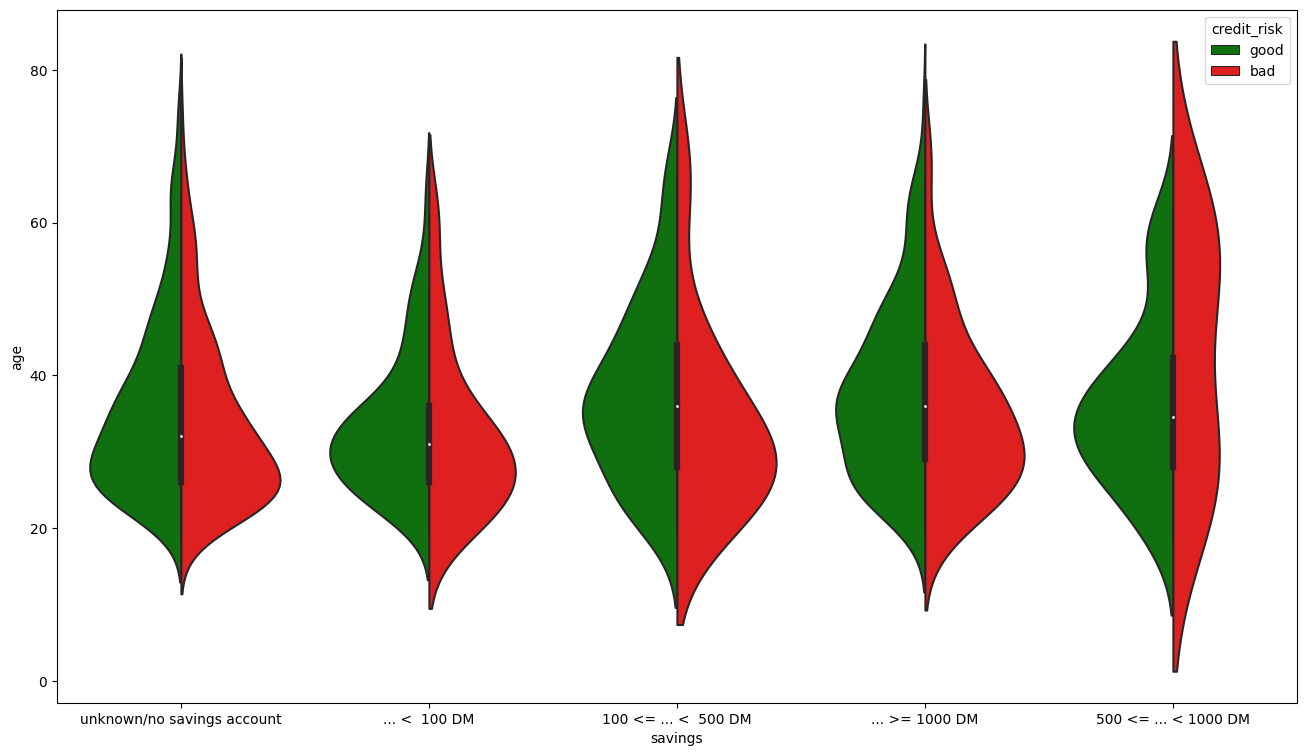

In [491]:
plt.figure(figsize=(16, 9))
sns.violinplot(x='savings', 
               y='age', data=df, 
               split=True, 
               hue='credit_risk', 
               palette=('green', 'red'))
plt.show()

### Задание 10  (0.5 балла)

Заканчивая с гистограммами, посмотрим на распределение положительных и отрицательных кейсов по возрастам, разместив их друг над другом. Добавим распределение всех взятых кредитов.

In [492]:
from matplotlib.patches import Rectangle

good_cred = df[df['credit_risk'] == 'good']['age']
bad_cred = df[df['credit_risk'] == 'bad']['age']
overall_age = df['age']

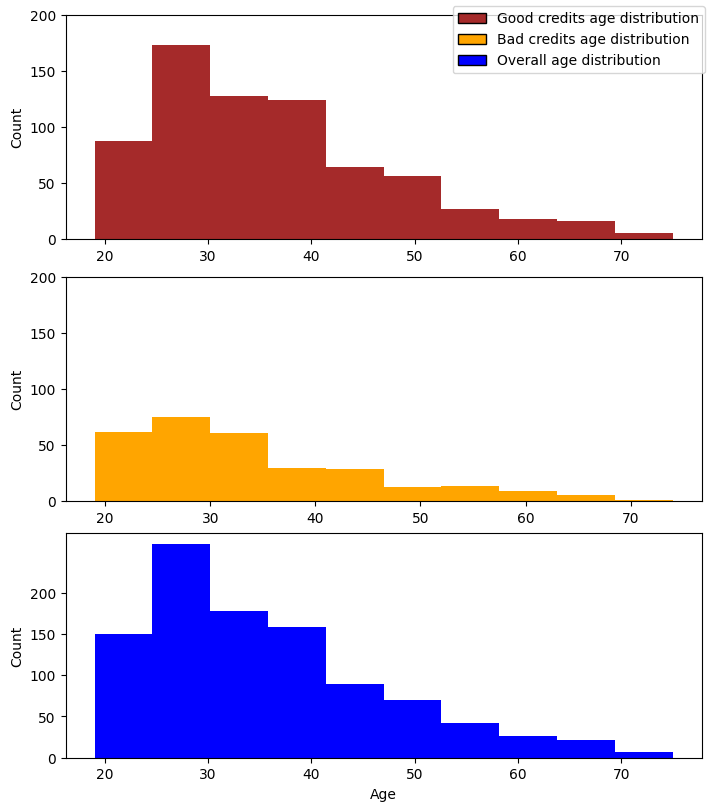

In [493]:
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, constrained_layout = True) # сабплоты
fig.set_size_inches(7, 8)

ax1.hist(good_cred, bins=10, color='brown')
ax2.hist(bad_cred, bins=10, color='orange')
ax3.hist(overall_age, bins=10, color='blue')

ax1.set_ylabel('Count') # подписи у каждого сабплота
ax2.set_ylabel('Count')
ax3.set_ylabel('Count')
ax3.set_xlabel('Age')


ax1.set_yticks(np.arange(0, 230, step=50))
ax2.set_yticks(np.arange(0, 230, step=50))
ax3.set_yticks(np.arange(0, 230, step=50))

colors = ['brown', 'orange', 'blue']
handles = [Rectangle((0, 0), 1, 1, color=c, ec="k") for c in colors]

labels = ["Good credits age distribution",
          "Bad credits age distribution",
          "Overall age distribution"]

fig.legend(handles, labels)

plt.show()
# распределения близки к нормальным

### Задание 11  (0.5 балла)

Не менее полезной иногда может быть диаграмма рассеяния. Постройте такую диаграмму с продолжительностью и размерами кредитов в качестве осей. Обозначьте положительные и отрицательные кейсы разными цветами.

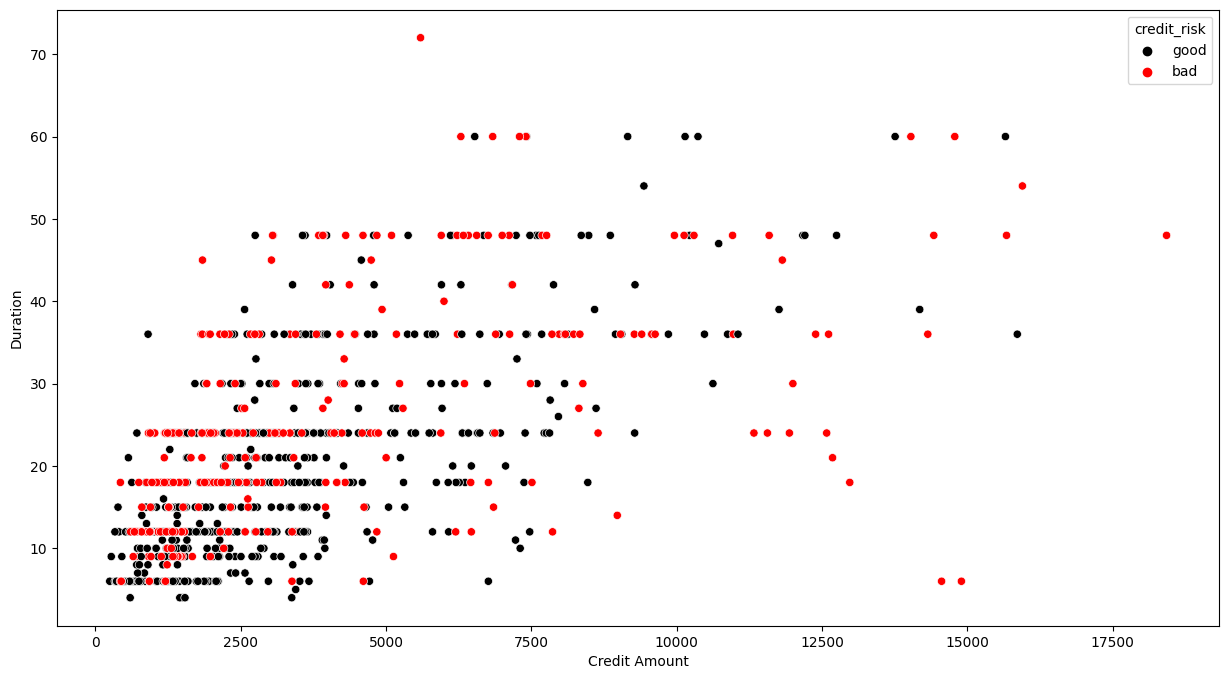

In [494]:
plt.figure(figsize=(15, 8))

diagram = sns.scatterplot(data=df,
                     x="amount",
                     y="duration",
                     hue="credit_risk",
                     palette=('black', 'red'))

diagram.set(xlabel='Credit Amount', ylabel='Duration')
plt.show() # официально больше никакого матплотлиба

### Задание 12  (1 балл)

Продвинемся глубже. Постройте 3D версию диаграммы рассеяния, добавив ось с возрастом.

In [495]:
# отберём то, что хотим отразить

bad_risk_am = df[df["credit_risk"] == 'bad']["amount"]
bad_risk_dur = df[df["credit_risk"] == 'bad']["duration"]
bad_risk_age = df[df["credit_risk"] == 'bad']["age"]

good_risk_am = df[df["credit_risk"] == 'good']["amount"]
good_risk_dur = df[df["credit_risk"] == 'good']["duration"]
good_risk_age = df[df["credit_risk"] == 'good']["age"]

<IPython.core.display.Javascript object>


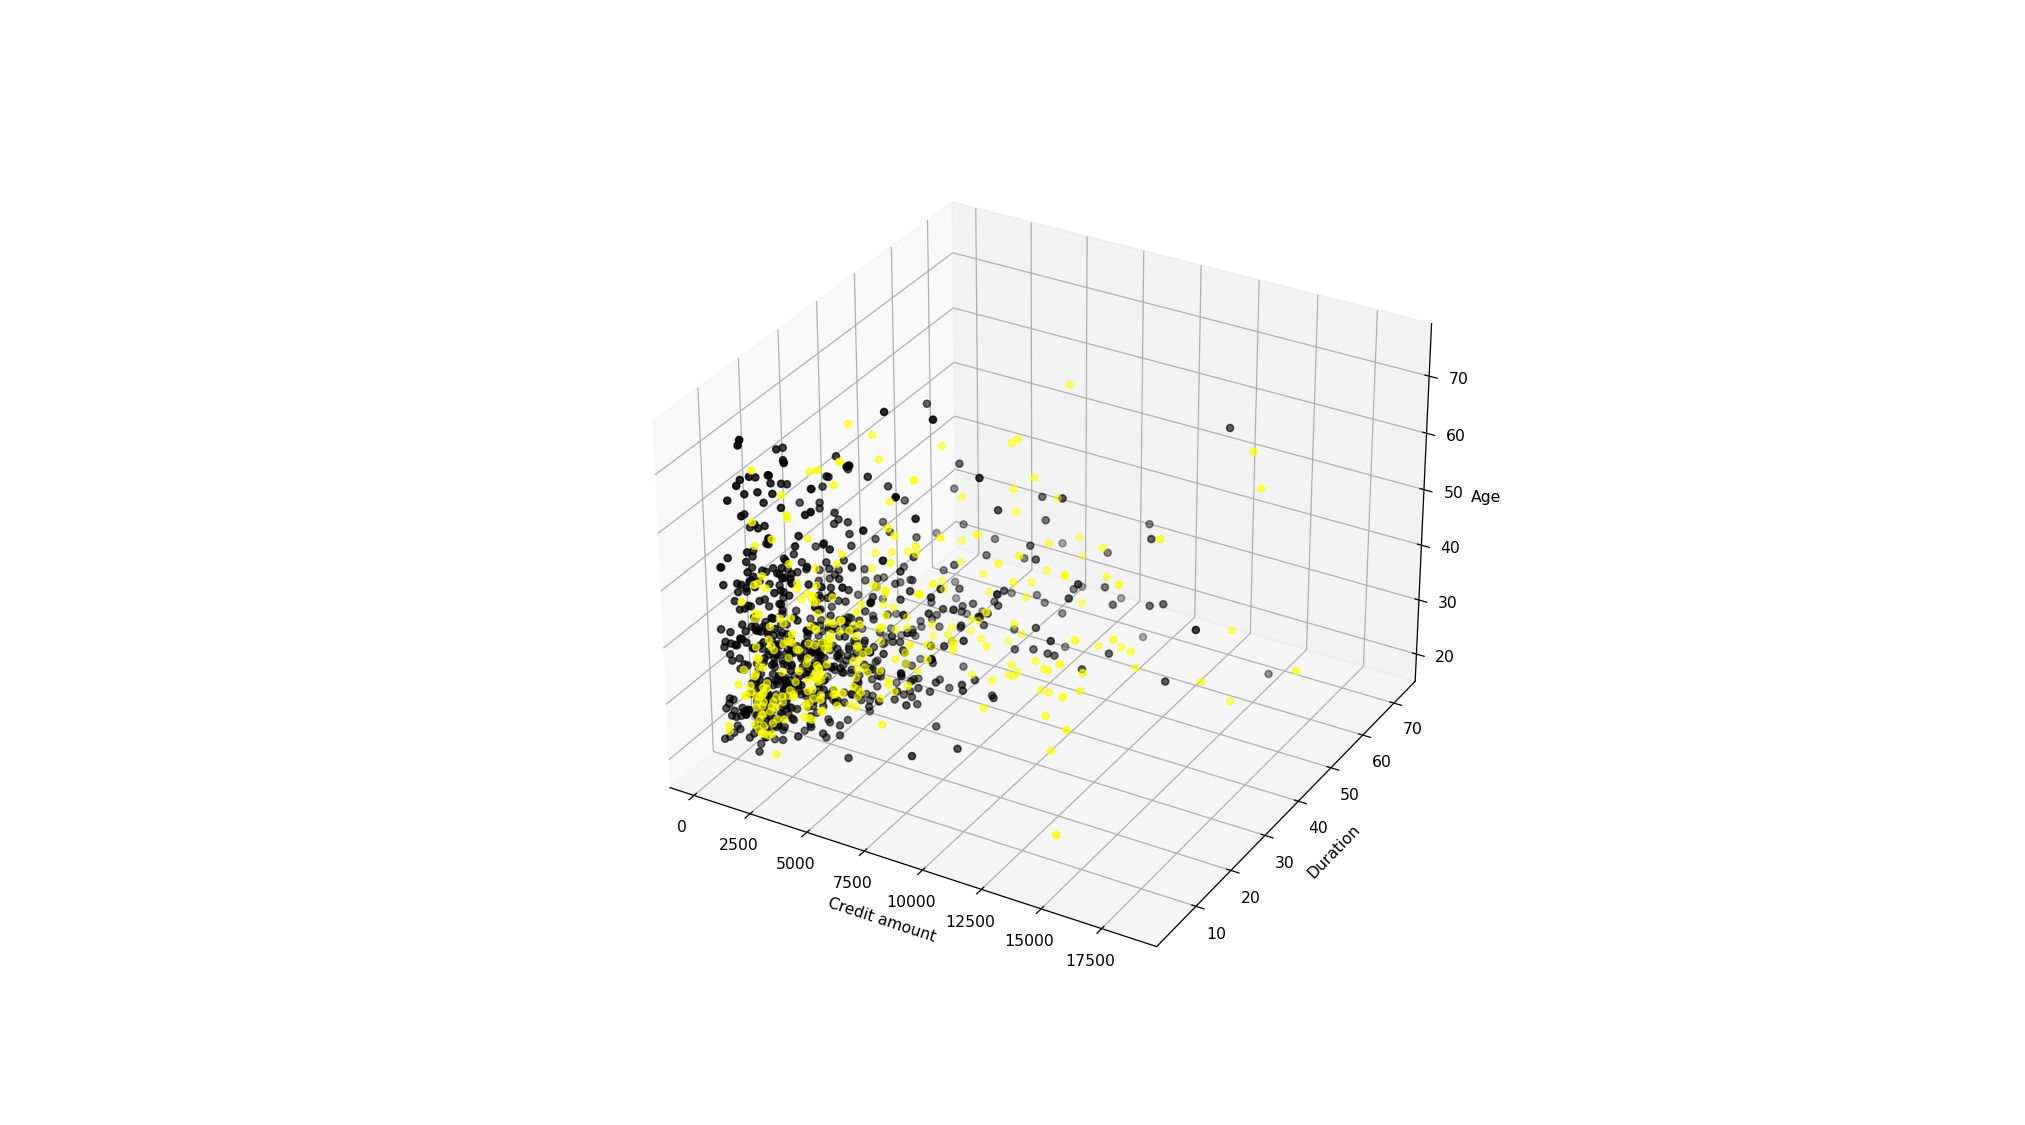

In [496]:
%matplotlib notebook

fig = plt.figure(figsize=(18, 10))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(bad_risk_am, bad_risk_dur, bad_risk_age, color='yellow')
ax.scatter(good_risk_am, good_risk_dur, good_risk_age, color='black')

ax.set_xlabel('Credit amount')
ax.set_ylabel('Duration')
ax.set_zlabel('Age')

plt.show()

### Задание 13  (0.5 балла)

Представьте все порядковые и бинарные признаки в виде числовых значений {0, ..., n - 1}, где n это количество значений признака. Избавьтесь от категориальных признаков.

In [499]:
from sklearn.preprocessing import LabelEncoder

label = LabelEncoder()
numeric_variables = ('age', 'amount')
df = df.drop(columns=['job', 'other_debtors', 'personal_status_sex', 'installment_rate'], axis=1) # удаляю категориальные признаки

columns_ = df.columns
for i in columns_:
    if i not in numeric_variables:
        df[i] = label.fit_transform(df[i]) # заменяю строковые значения на натуральные числа, начиная с 0

df

,status,duration,credit_history,purpose,amount,savings,employment_duration,present_residence,property,age,other_installment_plans,housing,number_credits,people_liable,telephone,foreign_worker,credit_risk
0,3,13,0,2,1049,4,2,3,1,21,1,0,0,0,0,0,1
1,3,5,0,5,2799,4,0,0,3,36,1,0,1,1,0,0,1
2,0,8,4,8,841,0,1,3,3,23,1,0,0,0,0,0,1
3,3,8,0,5,2122,4,0,0,3,39,1,0,1,1,0,1,1
4,3,8,0,5,2171,4,0,3,1,38,0,2,1,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,17,4,4,1987,4,0,3,3,21,1,0,0,1,0,0,0
996,3,17,4,5,2303,4,3,2,3,45,1,2,0,0,0,0,0
997,1,15,0,5,12680,1,3,3,2,30,1,1,0,0,1,0,0
998,0,8,4,4,6468,1,4,2,2,52,1,2,0,0,1,0,0


### Задание 14  (2 балла)

По результатам предыдущего задания у вас должна получиться таблица, в которой все признаки так или иначе представлены числовыми значениями. Попробуйте придумать на основе проведённых исследований данных какую-нибудь формулу, связывающую целевую переменную с признаками, не используя готовых инструментов машинного обучения. По желанию вы можете исключить ещё какие-то признаки, или, наоборот, сформировать новые на основе имеющихся. Возможно, вы захотите отмасштабировать большие наборы численных значений некоторых признаков с помощью интервалов. Цель: реализовать функцию, которая будет принимать на вход набор признаков для объекта выборки и возвращать прогноз целевой переменной (0 или 1). Например, вы можете просто сложить все признаки и возращать ноль, если сумма отрицательная, а в противном случае единицу. Но наверняка можно придумать лучше!
Данные уже разделены на набор для обучения, который вы можете использовать как угодно, и тестовый, на котором нужно будет проверить вашу точность. Постарайтесь достичь точности хотя бы 0.6.

In [500]:
df.corr('pearson').style.background_gradient(cmap='coolwarm') # вывожу корреляции Пирсона

,status,duration,credit_history,purpose,amount,savings,employment_duration,present_residence,property,age,other_installment_plans,housing,number_credits,people_liable,telephone,foreign_worker,credit_risk
status,1.000000,-0.020740,0.006162,-0.085370,-0.083951,0.214009,-0.000357,0.088114,0.018030,0.029220,-0.001111,-0.088540,-0.010882,0.069960,-0.064373,0.071003,-0.145605
duration,-0.020740,1.000000,0.014626,-0.029082,0.593035,-0.070673,0.011982,0.026010,-0.195166,-0.050742,0.004752,-0.008901,0.001560,-0.039061,0.176155,-0.153997,-0.215811
credit_history,0.006162,0.014626,1.000000,-0.010842,-0.009869,-0.032840,-0.090067,-0.049328,-0.022297,-0.167169,0.013600,-0.073922,-0.525449,-0.056707,-0.044958,-0.038650,-0.103144
purpose,-0.085370,-0.029082,-0.010842,1.000000,-0.110880,-0.048380,-0.065731,-0.054377,0.057109,0.044667,-0.012270,0.074666,0.062431,0.037697,-0.016974,-0.019527,-0.082523
amount,-0.083951,0.593035,-0.009869,-0.110880,1.000000,-0.063846,0.038745,0.001970,-0.139863,0.032273,-0.005884,-0.054162,0.020785,0.017144,0.277000,-0.030662,-0.154740
savings,0.214009,-0.070673,-0.032840,-0.048380,-0.063846,1.000000,-0.038283,-0.039495,0.065881,-0.013916,-0.008469,0.011178,0.035289,-0.021968,-0.051605,-0.006994,-0.115660
employment_duration,-0.000357,0.011982,-0.090067,-0.065731,0.038745,-0.038283,1.000000,0.268253,-0.022536,0.293871,-0.036563,-0.020900,0.085495,0.028019,0.110568,-0.025332,-0.008932
present_residence,0.088114,0.026010,-0.049328,-0.054377,0.001970,-0.039495,0.268253,1.000000,0.063849,0.226595,-0.030089,-0.217232,0.032519,0.009750,0.060252,-0.044994,0.012495
property,0.018030,-0.195166,-0.022297,0.057109,-0.139863,0.065881,-0.022536,0.063849,1.000000,0.124128,-0.014683,-0.064179,-0.001577,0.066592,-0.105979,0.103811,0.055529
age,0.029220,-0.050742,-0.167169,0.044667,0.032273,-0.013916,0.293871,0.226595,0.124128,1.000000,-0.030984,0.107936,0.150718,0.118589,0.143506,0.013981,0.091272


In [501]:
label = LabelEncoder()
# трансформируем в порядковые упорядоченные

df['amount'] = pd.cut(df['amount'].astype(int), 5)
df['amount'] = label.fit_transform(df['amount'])

df['duration'] = pd.cut(df['duration'].astype(int), 5)
df['duration'] = label.fit_transform(df['duration'])

print(df['amount'].unique(), df['duration'].unique())

[0 1 2 3 4] [2 0 1 3 4]


In [502]:
def predict(Xtest: np.array) -> np.array:
    temp = a = np.array([])
    for i in Xtest: # из максимальных возможных значений вычтем текущие у объектов и добавим в специальную переменную
        curr = sum((3 - i[0], 4 - i[1], 4 - i[4], 4 - i[5], i[11], i[15]))
        result = round(curr / (15)) # сумма максимальных значений у столбцов 0, 1, 4, 5 после всех преобразований
        temp = np.append(temp, result)
        curr = 0
    return temp

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
X = df.drop('credit_risk', axis=1).values
y = df['credit_risk'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=10)
# Используйте X_train и y_train на ваше усмотрение

accuracy_score(y_test, predict(X_test))

0.716